⚠️ UMAP not installed. Run `pip install umap-learn` to use it.
Loaded 28104 objects with dimension 256


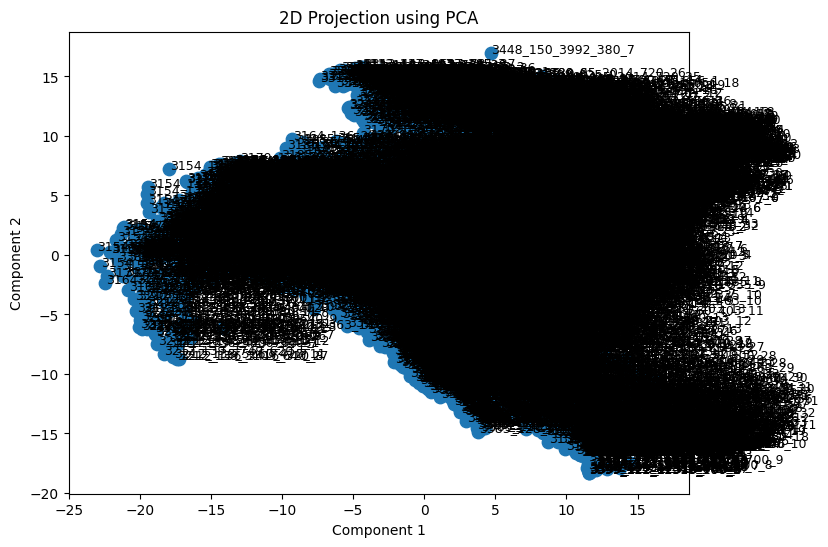

In [ ]:
# %% [markdown]
# # Feature Vector Projection from File
#
# This notebook loads feature vectors from a data file (with #objectKey lines
# and float vectors) and projects them into 2D using PCA, UMAP, t-SNE, or Random Projection.

# %%
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection

try:
    import umap
    HAS_UMAP = True
except ImportError:
    HAS_UMAP = False
    print("⚠️ UMAP not installed. Run `pip install umap-learn` to use it.")

# %% [markdown]
# ## Step 1: Load your data file
# Replace the path below with your file path

# %%
data_path = "/home/drking/Documents/Bakalarka/data/_SCL-segmented-actions-all/hdm05/all/lat_dim=256_beta=0.1/predictions_segmented_model=hdm05.data"  # ⬅️ change this to your file path

with open(data_path, "r") as f:
    raw_data = f.read()

# %% [markdown]
# ## Step 2: Parse object keys and vectors

# %%
keys = re.findall(r"#objectKey[^\n]+", raw_data)
vectors = [list(map(float, line.split(","))) for line in raw_data.splitlines() if re.match(r"^-?\d", line)]

X = np.array(vectors)
labels = [k.split()[-1] for k in keys]

print(f"Loaded {len(X)} objects with dimension {X.shape[1]}")

# %% [markdown]
# ## Step 3: Choose projection method

# %%
method = "pca"  # options: "pca", "umap", "tsne", "random"

if method == "pca":
    reducer = PCA(n_components=2)
    X_2d = reducer.fit_transform(X)

elif method == "umap" and HAS_UMAP:
    reducer = umap.UMAP(n_components=2)
    X_2d = reducer.fit_transform(X)

elif method == "tsne":
    reducer = TSNE(n_components=2, init="pca", random_state=42)
    X_2d = reducer.fit_transform(X)

elif method == "random":
    reducer = GaussianRandomProjection(n_components=2)
    X_2d = reducer.fit_transform(X)

else:
    raise ValueError("Unknown or unavailable method")

# %% [markdown]
# ## Step 4: Plot the result

# %%
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], s=80)

for i, label in enumerate(labels):
    plt.text(X_2d[i,0]+0.05, X_2d[i,1]+0.05, label, fontsize=9)

plt.title(f"2D Projection using {method.upper()}")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()
